In [1]:
from los_fabulosos_pixelotls.tools import *
import numpy as np
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

# get data

In [2]:
alldat = load_raw_data('../dat')

# define contrast levels to use

In [3]:
contrast_list = [(0,1),(0,0.5),(0,0.25),(0.25,1),(0.25,0.5),(0.5,1)]
n_levels = len(contrast_list)

# With Max

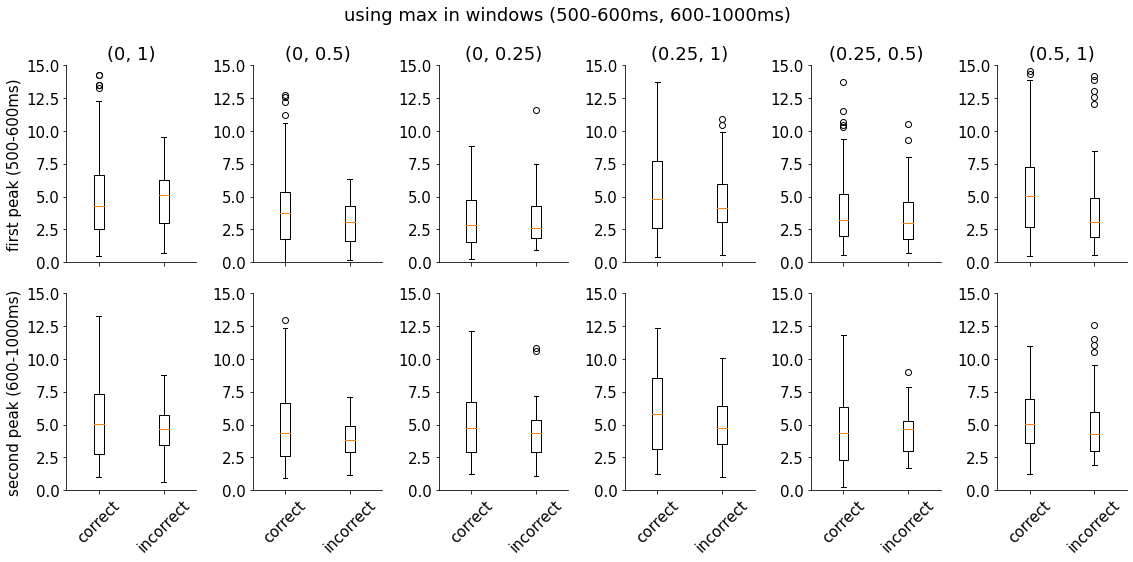

In [4]:
plt.figure(figsize=[16,8])
for icon, contrast_pair in enumerate(contrast_list):
    correct_fr, incorrect_fr = collect_firing_rates(alldat, contrast_pair=contrast_pair, selected_regions=["VISp"], gaussfilter=True, gauss_sigma=2)
    plt.subplot(2,n_levels,icon+1)
    plt.boxplot([correct_fr[:,50:60].max(axis=1), incorrect_fr[:,50:60].max(axis=1)])
    plt.subplot(2,n_levels,n_levels+icon+1)
    plt.boxplot([correct_fr[:,60:100].max(axis=1), incorrect_fr[:,60:100].max(axis=1)])

for iax in range(n_levels):
    plt.subplot(2,n_levels,iax+1)
    plt.title(contrast_list[iax])
    plt.xticks([1,2],['',''])
    plt.ylim([0,15])
    plt.subplot(2,n_levels,n_levels+iax+1)
    plt.xticks([1,2],['correct','incorrect'],rotation=45)
    plt.ylim([0,15])
    plt.subplot(2,n_levels,1)
    plt.ylabel('first peak (500-600ms)')
    plt.subplot(2,n_levels,n_levels+1)
    plt.ylabel('second peak (600-1000ms)')
plt.suptitle("using max in windows (500-600ms, 600-1000ms)")
plt.savefig("../fig/using_max.png", facecolor ='white', bbox_inches='tight')
plt.show()


# With Mean

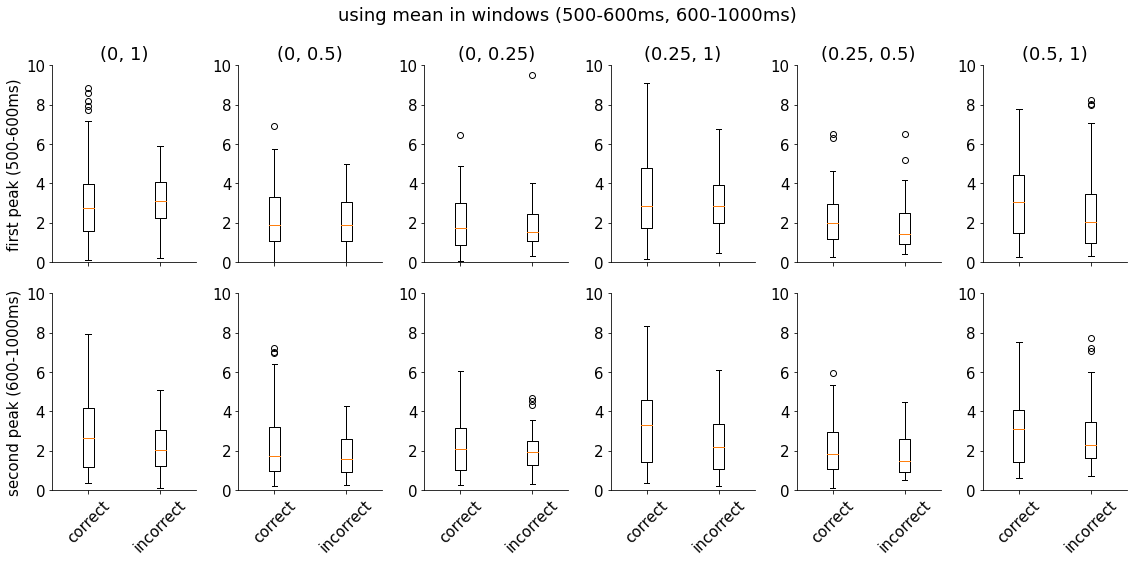

In [5]:
plt.figure(figsize=[16,8])
for icon, contrast_pair in enumerate(contrast_list):
    correct_fr, incorrect_fr = collect_firing_rates(alldat, contrast_pair=contrast_pair, selected_regions=["VISp"], gaussfilter=True, gauss_sigma=2)
    plt.subplot(2,n_levels,icon+1)
    plt.boxplot([correct_fr[:,50:60].mean(axis=1), incorrect_fr[:,50:60].mean(axis=1)])
    plt.subplot(2,n_levels,n_levels+icon+1)
    plt.boxplot([correct_fr[:,60:100].mean(axis=1), incorrect_fr[:,60:100].mean(axis=1)])

for iax in range(n_levels):
    plt.subplot(2,n_levels,iax+1)
    plt.title(contrast_list[iax])
    plt.xticks([1,2],['',''])
    plt.ylim([0,10])
    plt.subplot(2,n_levels,n_levels+iax+1)
    plt.xticks([1,2],['correct','incorrect'],rotation=45)
    plt.ylim([0,10])

    plt.subplot(2,n_levels,1)
    plt.ylabel('first peak (500-600ms)')
    plt.subplot(2,n_levels,n_levels+1)
    plt.ylabel('second peak (600-1000ms)')
plt.suptitle("using mean in windows (500-600ms, 600-1000ms)")
plt.savefig("../fig/using_mean.png", facecolor ='white', bbox_inches='tight')
plt.show()